# Análisis descriptivo y visualización de ventas de PepsiCo en Argentina.

Este proyecto tiene como objetivo analizar un conjunto de datos sin depurar correspondiente a las ventas de productos de PepsiCo realizadas por distintas distribuidoras en todo el país.

A través de herramientas de procesamiento y estadística descriptiva, se busca identificar patrones relevantes, limpiar el dataset y describir las variables disponibles para su análisis posterior.

---

## Integrantes del equipo

- Eglimar Ramirez  
- Francisco Oviedo  
- Jonathan Guillen  
- Jonathan Manuel Palomeque
- Lucas Ledesma  
- Maia Majzum  
- Valentina Pich


## Descripción general del dataset

El dataset contiene datos relacionados con la venta de productos, incluyendo:

- **Distribuidor**: nombre de la distribuidora.
- **Área**: región geográfica.
- **Artículo**: código identificador del producto.
- **Descripción**: nombre comercial del producto.
- **Cantidad**: unidades vendidas.
- **Capacidad**: gramos vendidos.
- **Línea**: línea o categoría comercial (ej. Gold, Platinum).
- **Rubro**: categoría general del producto (ej. Crakers).


## I) Importar librerias:


In [74]:
import pandas as pd #Importando librerias
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display #Libreria para mostrar dataframes

from google.colab import drive
drive.mount('/content/drive')

from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## II) Cargar DataSet y crear el Dataframe:

In [44]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto -  Analisis de Datos - 2025/Listado_Ventas.csv', encoding='latin1') #Lectura del archivo .csv para cargar en el notebook
df.head(10) #Mostrando las primeras 10 filas del dataset

,Distribuidor,Area,Articulo,Descripcion,Cantidad,Capacidad,Linea,Rubro
0,TOTAL CENTRO S.R.L.,NEA y Litoral,300063098,Twistos Minit Queso 95gx30x1,"4,319.00","410,495.00",Gold/Crakers,Crakers
1,TOTAL CENTRO S.R.L.,NEA y Litoral,300063097,Twistos Minit Queso 100gx30,"4,027.00","382,565.00",Gold/Crakers,Crakers
2,TOTAL CENTRO S.R.L.,NEA y Litoral,300052695,Twistos Minit Jamon 100gx30,70.00,7.00,Gold/Crakers,Crakers
3,TOTAL CENTRO S.R.L.,NEA y Litoral,300052696,Twistos Minit Jamon 40gx112x1,"3,284,940.00",34.36,Platinum/Crakers,Crakers
4,TOTAL CENTRO S.R.L.,NEA y Litoral,300063264,Twistos Minit Queso 40gx112x1,"3,284,940.00",25.36,Platinum/Crakers,Crakers
5,TOTAL CENTRO S.R.L.,NEA y Litoral,300063263,Twistos Minit Jamon 40gx84,287.00,11.48,Platinum/Crakers,Crakers
6,TOTAL CENTRO S.R.L.,NEA y Litoral,300052694,Twistos Minit Jamon 155gx20,"1,881.00","291,555.00",Silver/Crakers,Crakers
7,TOTAL CENTRO S.R.L.,NEA y Litoral,300062972,PehuamarÂ acanaladaÂ 230gx14x1,264.00,69.96,Bronze/Salty,Salty
8,TOTAL CENTRO S.R.L.,NEA y Litoral,300062973,Pehuamar Papa Lisa 230gx14x1,194.00,44.62,Bronze/Salty,Salty
9,TOTAL CENTRO S.R.L.,NEA y Litoral,300060197,Pehuamar Acanalada 485x9,97.00,22.31,Bronze/Salty,Salty


In [45]:
# Configurar pandas para que no use notación científica
pd.set_option('display.float_format', '{:,.2f}'.format)

## III) Exploración inicial del dataset

1. TAMAÑO DEL DATASET

In [46]:
df.shape

(1777, 8)

**Comentario:** El dataset consta de 1777 filas y 8 columnas

2. COLUMNAS

In [47]:
df.columns

Index(['Distribuidor ', 'Area', 'Articulo', 'Descripcion', 'Cantidad',
       'Capacidad', 'Linea', 'Rubro'],
      dtype='object')

3. TIPO DE DATOS

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777 entries, 0 to 1776
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Distribuidor   1777 non-null   object 
 1   Area           1777 non-null   object 
 2   Articulo       1777 non-null   int64  
 3   Descripcion    1777 non-null   object 
 4   Cantidad       1693 non-null   float64
 5   Capacidad      1777 non-null   float64
 6   Linea          1777 non-null   object 
 7   Rubro          1777 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 111.2+ KB


**Comentarios:**

La data incluye:


*  variables numéricas: Articulo, Cantidad y Capacidad, estas dos últimas se deben convertir a tipo de dato entero.

*  variables categóricas: Distribuidor, Area, Descripcion, Linea y Rubro.

*  Sólo la variable cantidad prensenta datos nulos y además representa datos enteros de cantidad de artíclos, por lo que debe transformarse a int64.

* La variable Capacidad, puede soportar valores decimales de acuerdo a la unidad de medida que se emplee. En gramos sería una variable entera, pero en kg puede ser decimal.

4. TRANSFORMANDO EL TIPO DE DATO DE LA VARIABLE CANTIDAD

In [49]:
# Hacer una copia del dataset
df_copia = df.copy()

# Transformar columnas de float a int
df_copia["Cantidad"] = df_copia["Cantidad"].astype("Int64")  # Usa 'Int64' para soportar valores nulos


# Verificar los cambios
print(df_copia[["Cantidad"]].dtypes)

Cantidad    Int64
dtype: object


## IV) Analisis de columnas numéricas (válidos, nulos, media, mediana, desviación estandar y mal registrados)

1. EXPLORACIÓN PARCIAL

In [50]:
# Estadísticas para 'cantidad'
print("📊 Estadísticas de 'Cantidad':\n")
print(df_copia['Cantidad'].describe(percentiles=[.25, .5, .75, .9]))

# Estadísticas para 'capacidad'
print("\n📊 Estadísticas de 'Capacidad':\n")
print(df_copia['Capacidad'].describe(percentiles=[.25, .5, .75, .9]))



📊 Estadísticas de 'Cantidad':

count       1,693.00
mean      109,210.49
std       582,171.96
min           -33.00
25%           165.00
50%           655.00
75%         2,878.00
90%         8,597.40
max     3,284,940.00
Name: Cantidad, dtype: Float64

📊 Estadísticas de 'Capacidad':

count        1,777.00
mean       105,021.86
std        671,860.82
min         -5,005.00
25%             28.35
50%            221.24
75%         33,649.00
90%        226,057.20
max     25,294,038.00
Name: Capacidad, dtype: float64


**Observaciones:**


**variable Cantidad:**

- Hay 1693 valores no nulos.
- En promedio, hay 109 mil unidades por registro.
- La desviación estándar muy alta, lo que indica mucha dispersión, hay valores muy alejados del promedio.
- Hay cantidades negativas que se consideran no válidas en el análisis.
- El 25% de los datos tiene menos de 165 unidades.
- La mitad de los registros tiene menos de 655 unidades.
- El 75% tiene menos de 2878 unidades.
- El valor max es muy alto con respecto al 90% de los datos, se considera que hay valores extremos.


**variables capacidad:**
- Hay 1777 Valores no nulos.
- Promedio de capacidad muy alto.
- Muy alta dispersión también.
- Capacidad con valores negativos.
- Un cuarto de los productos tiene menos de ~33g.
- La mitad tiene menos de ~246g.
- 75% tiene menos de 36 kg.
- valor max	25,294,040.0	Más de 25 toneladas si está en gramos. Es muy probable que sea un error de carga.

**Conlusiones y Recomendaciones:**
                                                                                

- Hay outliers fuertes que sesgan el promedio.

- Hay datos negativos que no tienen sentido.

- El rango es enorme, desde gramos hasta toneladas en la columna capacidad.


- Se Requiere revisar unidades (g, kg, error de carga).

- Tratar outliers extremos y negativos.



2. EXPLORACIÓN GENERAL

In [51]:
# Seleccionar columnas numéricas
columnas_numericas = df_copia.select_dtypes(include='number').columns

# Crear una lista para almacenar resultados
resultados = []

for col in columnas_numericas:
    total = len(df_copia)
    validos = df_copia[col].notna().sum()
    nulos = df_copia[col].isna().sum()

    # Se interpretan como mal registrados o erróneos los valores negativos o cero.
    erroneos = df_copia[col][df_copia[col] <= 0].count()

    media = df_copia[col].mean()
    mediana = df_copia[col].median()
    std = df_copia[col].std()

    resultados.append({
        "Columna": col,
        "Total": total,
        "Válidos": validos,
        "Nulos": nulos,
        "Erróneos": erroneos,
        "Media": round(media, 2),
        "Mediana": round(mediana, 2),
        "Desvío estándar": round(std, 2)
    })

# Mostrar resultados
pd.DataFrame(resultados)

,Columna,Total,Válidos,Nulos,Erróneos,Media,Mediana,Desvío estándar
0,Articulo,1777,1777,0,0,"300,057,158.72","300,060,091.00","6,640.24"
1,Cantidad,1777,1693,84,6,"109,210.49",655.00,"582,171.96"
2,Capacidad,1777,1777,0,8,"105,021.86",221.24,"671,860.82"


## V) Análisis de columnas categóricas (válidos, nulos, mal registrados y cantidad de registros por categoría)

1. EXPLORACIÓN GENERAL

In [52]:
# Seleccionar solo las columnas categóricas (no numéricas)
columnas_categoricas = df_copia.select_dtypes(exclude='number').columns

# Guardar resultados en una lista
resultados = []

for col in columnas_categoricas:
    total = len(df_copia)
    validos = df_copia[col].notna().sum()
    nulos = df_copia[col].isna().sum()
    categorias = df_copia[col].nunique()

    # Se interpretan como mal registrados o erróneos los valores vacíos
    erroneos = df_copia[col].isin(["", " ", "-", "Sin dato", "No aplica"]).sum()

    resultados.append({
        "Columna": col,
        "Total registros": total,
        "Válidos": validos,
        "Nulos": nulos,
        "Mal registrados (vacíos o inválidos)": erroneos,
        "Cantidad de categorías distintas": categorias
    })

# Mostrar resultados
pd.DataFrame(resultados)

,Columna,Total registros,Válidos,Nulos,Mal registrados (vacíos o inválidos),Cantidad de categorías distintas
0,Distribuidor,1777,1777,0,0,20
1,Area,1777,1777,0,0,7
2,Descripcion,1777,1777,0,0,255
3,Linea,1777,1777,0,0,15
4,Rubro,1777,1777,0,0,3


1. EXPLORACIÓN PARCIAL

In [53]:
for col in columnas_categoricas:
    print(f"\nColumna: {col}")
    print(df_copia[col].value_counts().sort_index())


Columna: Distribuidor 
Distribuidor 
BACOSHOPERS SRL                   81
BAHIA BLANCA S.R.L.               95
BARASI HNOS SA                    97
BRINDARSE S.A.                   105
CHABS S. R. L.                    51
DISTRIBUIDORA AMANECER S.R.L.     90
DISTRIBUIDORA CATAMARCA S. A.     87
DISTRIBUIDORA J.F.T. S.R.L.       91
DISTRIBUIDORA NORTE S.R.L.        53
DISTRIBUIDORA POSITANO SRL        98
ELECTRON SRL                      92
LEGOS S.R.L                       99
LERVO S. A.                       63
LOGISTICAS S.R.L.                 97
MARCELINA DISTRIBUIDORA S.A.      80
NEUQUEN S.R.L                    108
PREMIUM S.R.L.                   101
PRIMEROS PRODUCTOS S.A.          101
TOTAL  CENTRO S.R.L.              87
USHUAIA S.R.L.                   101
Name: count, dtype: int64

Columna: Area
Area
Atlantico y Cordillera    306
Centro y Cuyo             239
Costa y La Pampa          277
GBA Norte                 260
GBA Sur                   283
NEA y Litoral             

**Observaciones:**

- Se detectaron problemas de tipeo, formato variable en la columna descripción.

- Posibles duplicados con diferentes formatos.

## VI) Análisis de datos válidos, nulos y mal registrados en columnas no categóricas o numéricas

In [54]:
# Seleccionar la columna "Articulo"
col = "Articulo"

# Total de registros
total = len(df)

# Valores válidos (no nulos)
validos = df[col].notna().sum()

# Valores nulos
nulos = df[col].isna().sum()

# Mal registrados (valores vacíos, guiones o espacios)
mal_registrados = df[col].isin(["", " ", "-", "Sin dato", "No aplica"]).sum()

# Mostrar resultados
print(f"Columna: {col}")
print(f"Total de registros: {total}")
print(f"Válidos: {validos}")
print(f"Nulos: {nulos}")
print(f"Mal registrados: {mal_registrados}")

Columna: Articulo
Total de registros: 1777
Válidos: 1777
Nulos: 0
Mal registrados: 0


**Determinando si hay códigos diferentes asociados a descripciones iguales o parecidas**

In [55]:
df_copia[['Articulo', 'Descripcion']]

,Articulo,Descripcion
0,300063098,Twistos Minit Queso 95gx30x1
1,300063097,Twistos Minit Queso 100gx30
2,300052695,Twistos Minit Jamon 100gx30
3,300052696,Twistos Minit Jamon 40gx112x1
4,300063264,Twistos Minit Queso 40gx112x1
...,...,...
1772,300060200,Tostitos 200gx14 (14)
1773,300060191,Doritos Queso 200gx14
1774,300060231,Lays Clasicas 330gx9
1775,300030738,Quaker Barras Mousse De Choco 20x156g


In [56]:
duplicados = df_copia.groupby('Descripcion')['Articulo'].nunique()
duplicados = duplicados[duplicados > 1]
print(duplicados)

Descripcion
3d Mega Queso Pc Dts 23grx120    2
3d Queso 143gx18x1               2
3d Queso 43gx75x1                2
3d Queso 85gx27x1                2
Cheetos 23grx108                 2
                                ..
Twistos Minit Jamon 40gx112x1    2
Twistos Minit Jamon 40gx84       2
Twistos Minit Queso 100gx30      2
Twistos Minit Queso 40gx112x1    2
Twistos Minit Queso 95gx30x1     2
Name: Articulo, Length: 83, dtype: int64


In [57]:
df_copia[df_copia['Descripcion'].isin(duplicados.index)].sort_values('Descripcion')[['Descripcion', 'Articulo']].drop_duplicates()

,Descripcion,Articulo
416,3d Mega Queso Pc Dts 23grx120,300052023
49,3d Mega Queso Pc Dts 23grx120,300052757
824,3d Queso 143gx18x1,300058397
62,3d Queso 143gx18x1,300060190
1658,3d Queso 43gx75x1,300058395
...,...,...
1,Twistos Minit Queso 100gx30,300063097
1235,Twistos Minit Queso 40gx112x1,300063263
4,Twistos Minit Queso 40gx112x1,300063264
372,Twistos Minit Queso 95gx30x1,300063097


**Observaciones**

- Hay 82 descripciones o productos bases iguales registrados con códigos diferentes.

## VII) Limpieza de datos

### 1. Estandarizacion/ normalizacion de los datos de la columna Descripcion

In [58]:
# Corregir errores ortograficos:

df_copia['Descripcion'] = df_copia['Descripcion'].replace('PehuamarÂ acanaladaÂ 230gx14x1', 'Pehuamar acanalada 230gx14x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('ManiÂ salÂ peladoÂ 75gx64x1', 'Mani sal pelado 75gx64x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Twist0s Minit Qu3s0 40gx112x1', 'Twistos Minit Queso 40gx112x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('PehuamarÂ maicitosÂ 265gx10x1', 'PehuamaÂ maicitos 265gx10x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('PehuamarÂ maicit0sÂ 265gx10x1', 'Pehuamar maicitos 265gx10x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Pep Ru3ditas 40gx60 Pi', 'Pep Rueditas 40gx60 Pi')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Pehuamar Paliqu3s0 90gx36', 'Pehuamar Paliqueso 90gx36')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Maniax Sal Y Lim0n 95gx60x11', 'Maniax Sal Y Limon 95gx60x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('3d Mega Ques0 Pc Dts 23grx120', '3d Mega Queso Pc Dts 23grx120')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Quak3r Barra Frutilla Con Crema 180gx20', 'Quaker Barra Frutilla Con Crema 180gx20')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Twist0s Minit Qu3s0 95gx30x1', 'Twistos Minit Queso 95gx30x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Maniax Aji Y Lim0n 110gx56', 'Maniax Aji Y Limon 110gx56')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Maniax Jap0n3s Sal 95gx40x1', 'Maniax Japones Sal 95gx40x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Cheetos Ques0 140gx18x1', 'Cheetos Queso 140gx18x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('D0rit0s Qu3s0 77gx17 Exp Arg', 'Doritos Queso 77gx17 Exp Arg')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('D0rit0s Dinamita Fh 70gx44x1', 'Doritos Dinamita Fh 70gx44x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Twistos Minit Jam0n 155gx20', 'Twistos Minit Jamon 155gx20')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Quaker Barra Frutilla C0n Cr3ma 180gx20', 'Quaker Barra Frutilla Con Crema 180gx20')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Mani P3lad0 320gx17x1', 'Mani Pelado 320gx17x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Ch33t0s Qu3s0 229gx12x1', 'Cheetos Queso 229gx12x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('3d Qu3s0 43gx75x1', '3d Queso 43gx75x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Lays Jam0n S3rran0 34gx72', 'Lays Jamon Serrano 34gx72')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Lays Qso Y Cebolla 34gx72', 'Lays Queso Y Cebolla 34gx72')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Twist0s Minit Queso 40gx112x1', 'Twistos Minit Queso 40gx112x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Twist0s Minit Qu3s0 155gx20', 'Twistos Minit Queso 155gx20')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('P3p Ru3ditas 40gx60 Pi', 'Pep Rueditas 40gx60 Pi')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Mani Sal C0n Pi3l 75gx64x1', 'Mani Sal Con Piel 75gx64x1')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('PehuamarÂ maicitosÂ 265gx10x1 (10)', 'Pehuamar maicitos 265gx10x1 (10)')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Lays Qso Y Cebolla 34gx72 (72)', 'Lays Queso Y Cebolla 34gx72 (72)')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Mani P3lad0 320gx17x1 (17)', 'Mani Pelado 320gx17x1 (17)')
df_copia['Descripcion'] = df_copia['Descripcion'].replace('Ch33t0s Qu3s0 229gx12x1 (12)', 'Cheetos Queso 229gx12x1 (12)')

Obtener  por valor de descripcion, los  codigos de articulos asociados

In [59]:
# Agrupar por descripción y listar todos los códigos asociados a cada una
tabla_resumen = (
    df_copia.groupby('Descripcion')
    .agg({
        'Articulo': lambda x: list(x)  # lista de códigos por descripción
    })
    .reset_index()
)

# Agregar columna con la cantidad de códigos distintos por descripción
tabla_resumen['Cantidad_codigos'] = tabla_resumen['Articulo'].apply(len)

# Ordenar de mayor a menor por cantidad de códigos
tabla_resumen = tabla_resumen.sort_values(by='Cantidad_codigos', ascending=False)

# Mostrar los casos donde hay más de 1 código por descripción
tabla_duplicadas = tabla_resumen[tabla_resumen['Cantidad_codigos'] > 1]

# Ver resultados
print(tabla_duplicadas)

                         Descripcion  \
16            Cheetos Queso 43gx70x1   
113    Maniax Japones Jamon 95gx40x1   
12           Cheetos Queso 140gx18x1   
129        Pehuamar Acanalada 80gx25   
178             Pep Rueditas 74grx36   
..                               ...   
101              Mani Pelado 110gx40   
93      Lays Provoleta 77gx28x1 (28)   
213            Tostitos 200gx14 (14)   
121       Maniax Sal Y Limon 110gx56   
118  Maniax Mani Japones Sal 110gx36   

                                              Articulo  Cantidad_codigos  
16   [300059545, 300059433, 300059433, 300059433, 3...                22  
113  [300062585, 300061021, 300061021, 300061021, 3...                22  
12   [300058397, 300060662, 300060662, 300060662, 3...                21  
129  [300060662, 300052667, 300052667, 300052667, 3...                21  
178  [300050336, 300052757, 300052757, 300052757, 3...                21  
..                                                 ...               

### 2. Datos Ausentes (nulos):


Se detectaron 84 valores nulos en la columna Cantidad, que representan unidades vendidas. Este campo es fundamental y no debería estar vacío

In [60]:
# Ver registros con valores nulos en la columna 'Cantidad'
df_copia[df_copia['Cantidad'].isna()].head()


,Distribuidor,Area,Articulo,Descripcion,Cantidad,Capacidad,Linea,Rubro
37,TOTAL CENTRO S.R.L.,NEA y Litoral,300052622,Doritos Dinamita Fh 70gx64x1 Ex Arg,<NA>,0.51,Gold/Salty,Salty
61,TOTAL CENTRO S.R.L.,NEA y Litoral,300060193,Doritos Queso 129gx19,<NA>,"579,148.00",Silver/Salty,Salty
68,TOTAL CENTRO S.R.L.,NEA y Litoral,300060097,Lays Clasicas 230gx14x1,<NA>,"99,495.00",Silver/Salty,Salty
93,BRINDARSE S.A.,NOA,300063098,Twistos Minit Jamon 95gx30x1,<NA>,"8,835.00",Gold/Crakers,Crakers
114,BRINDARSE S.A.,NOA,300063271,Mani sal pelado 75gx64x1,<NA>,674.40,Gold/Salty,Salty


In [61]:
# Eliminar las filas con nulos en 'Cantidad'
df_copia = df_copia[df_copia['Cantidad'].notna()]


### 3.  Datos erróneos



Se encontraron valores negativos en las columnas Cantidad y Capacidad. En este contexto, no tiene sentido tener cantidades o pesos negativos.

In [62]:
# Mostrar registros con cantidad negativa
df_copia[df_copia['Cantidad'] < 0]

,Distribuidor,Area,Articulo,Descripcion,Cantidad,Capacidad,Linea,Rubro
578,LOGISTICAS S.R.L.,Atlantico y Cordillera,300060352,Lays Mayonesa 77gx28x1,-2,-0.15,Gold/Salty,Salty
588,LOGISTICAS S.R.L.,Atlantico y Cordillera,300062122,Lays Mostaza 34gx72x1,-3,-0.10,Potato Chips,Salty
943,PREMIUM S.R.L.,GBA Sur,300052892,Cheetos Queso 94x24,-1,-0.09,Gold/Salty,Salty
944,PREMIUM S.R.L.,GBA Sur,300060352,Lays Mayonesa 77gx28x1,-33,"-2,541.00",Gold/Salty,Salty
966,PREMIUM S.R.L.,GBA Sur,300060354,Lays Ketchup 34gx72x1,-2,-0.07,Platinum/Salty,Salty
967,PREMIUM S.R.L.,GBA Sur,300060353,Lays Mayonesa 34gx72x1,-14,-0.48,Platinum/Salty,Salty


In [63]:
# Eliminar filas con cantidades negativas
df_copia = df_copia[df_copia['Cantidad'] >= 0]

In [64]:
# Revisar capacidad negativa o fuera de escala, filtrando capacidades sospechosas
df_copia[df_copia['Capacidad'] < 0]  # Negativas
df_copia[df_copia['Capacidad'] > 1000000]  # Muy grandes (1 tonelada o mas)

,Distribuidor,Area,Articulo,Descripcion,Cantidad,Capacidad,Linea,Rubro
109,BRINDARSE S.A.,NOA,300060195,Lays Clasicas 85gx25x1,35605,"3,026,425.00",Gold/Salty,Salty
110,BRINDARSE S.A.,NOA,300060192,Doritos Queso 77gx26,20953,"1,613,381.00",Gold/Salty,Salty
159,BRINDARSE S.A.,NOA,300060193,Lays Clasicas 134gx19x1,9163,"1,227,842.00",Silver/Salty,Salty
190,DISTRIBUIDORA AMANECER S.R.L.,Costa y La Pampa,300062972,PehuamaÂ maicitos 265gx10x1,6697,"1,774,705.00",Bronze/Salty,Salty
195,DISTRIBUIDORA AMANECER S.R.L.,Costa y La Pampa,300060192,Doritos Queso 77gx26,18431,"1,419,187.00",Gold/Salty,Salty
196,DISTRIBUIDORA AMANECER S.R.L.,Costa y La Pampa,300060195,Lays Clasicas 85gx25x1,14593,"1,240,405.00",Gold/Salty,Salty
286,DISTRIBUIDORA POSITANO SRL,GBA Norte,300060095,Pehuamar Papa Lisa 485gx9,4771,"2,313,935.00",Bronze/Salty,Salty
293,DISTRIBUIDORA POSITANO SRL,GBA Norte,300060192,Doritos Queso 77gx26,26226,"2,019,402.00",Gold/Salty,Salty
294,DISTRIBUIDORA POSITANO SRL,GBA Norte,300060195,Lays Clasicas 85gx25x1,21909,"1,862,265.00",Gold/Salty,Salty
915,PREMIUM S.R.L.,GBA Sur,300060195,Lays Clasicas 85gx25x1,35799,"3,042,915.00",Gold/Salty,Salty


In [65]:
# Eliminar registros con capacidad negativa o superior a 1,000,000g (1 tonelada)
df_copia = df_copia[(df_copia['Capacidad'] >= 0) & (df_copia['Capacidad'] <= 1000000)]


### 4. Datos duplicados


Se encontraron descripciones de productos que aparecen más de una vez con diferentes códigos de artículo, lo que puede ser un duplicado lógico

In [66]:
# Detección de duplicados
duplicados = df_copia.groupby('Descripcion')['Articulo'].nunique()
duplicados = duplicados[duplicados > 1]
print(duplicados)


Descripcion
3d Mega Queso Pc Dts 23grx120    2
3d Queso 143gx18x1               2
3d Queso 43gx75x1                2
3d Queso 85gx27x1                2
Cheetos 23grx108                 2
                                ..
Twistos Minit Jamon 40gx112x1    2
Twistos Minit Jamon 40gx84       2
Twistos Minit Queso 100gx30      2
Twistos Minit Queso 40gx112x1    2
Twistos Minit Queso 95gx30x1     2
Name: Articulo, Length: 80, dtype: int64


In [67]:
# Ver duplicados exactos
df_copia[df_copia.duplicated()]

,Distribuidor,Area,Articulo,Descripcion,Cantidad,Capacidad,Linea,Rubro
1692,LEGOS S.R.L,GBA Norte,300062584,Lays Provoleta 77gx28x1,2180,167.86,Gold/Salty,Salty
1693,DISTRIBUIDORA J.F.T. S.R.L.,Centro y Cuyo,300060092,Pehuamar Palisal 165gx21x1,9,"1,485.00",Silver/Salty,Salty
1695,BAHIA BLANCA S.R.L.,Costa y La Pampa,300060191,Doritos Queso 200gx14,52,10.40,Silver/Salty,Salty
1696,DISTRIBUIDORA POSITANO SRL,GBA Norte,300060869,Maniax Sal Y Limon 95gx60x1,321,"30,495.00",Gold/Salty,Salty
1697,NEUQUEN S.R.L,Atlantico y Cordillera,300061021,Maniax Japones Jamon 95gx40x1,1064,101.08,Gold/Salty,Salty
...,...,...,...,...,...,...,...,...
1772,PRIMEROS PRODUCTOS S.A.,GBA Sur,300060200,Tostitos 200gx14 (14),21,4.20,Silver/Salty,Salty
1773,LOGISTICAS S.R.L.,Atlantico y Cordillera,300060191,Doritos Queso 200gx14,34,6.80,Silver/Salty,Salty
1774,DISTRIBUIDORA POSITANO SRL,GBA Norte,300060231,Lays Clasicas 330gx9,202,66.66,Silver/Salty,Salty
1775,BRINDARSE S.A.,NOA,300030738,Quaker Barras Mousse De Choco 20x156g,178,"4,628.00",Silver/Cereals,Cereals


In [68]:
# Eliminar duplicados exactos
df_copia = df_copia.drop_duplicates()

### Comparación entre el dataset inicial y el resultante luego de la limpieza

In [69]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1570 entries, 0 to 1690
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Distribuidor   1570 non-null   object 
 1   Area           1570 non-null   object 
 2   Articulo       1570 non-null   int64  
 3   Descripcion    1570 non-null   object 
 4   Cantidad       1570 non-null   Int64  
 5   Capacidad      1570 non-null   float64
 6   Linea          1570 non-null   object 
 7   Rubro          1570 non-null   object 
dtypes: Int64(1), float64(1), int64(1), object(5)
memory usage: 111.9+ KB


Luego del proceso de limpieza, el dataset quedó con 1570 registros, es decir, se eliminaron 207 registros por contener:

* Valores nulos en Cantidad

* Valores negativos o extremos en Cantidad y Capacidad

* Registros duplicados exactos

Se transformó la columna Cantidad al tipo entero (Int64), manteniendo compatibilidad con operaciones matemáticas y control de nulos.

In [70]:
# Estadísticas para 'cantidad'
print("📊 Estadísticas de 'Cantidad':\n")
print(df_copia['Cantidad'].describe(percentiles=[.25, .5, .75, .9]))

# Estadísticas para 'capacidad'
print("\n📊 Estadísticas de 'Capacidad':\n")
print(df_copia['Capacidad'].describe(percentiles=[.25, .5, .75, .9]))


📊 Estadísticas de 'Cantidad':

count       1,570.00
mean      108,755.81
std       582,186.20
min             1.00
25%           160.50
50%           629.00
75%         2,687.50
90%         7,108.90
max     3,284,940.00
Name: Cantidad, dtype: Float64

📊 Estadísticas de 'Capacidad':

count     1,570.00
mean     59,129.33
std     147,959.52
min           0.00
25%          28.69
50%         223.51
75%      28,202.50
90%     186,777.00
max     978,435.00
Name: Capacidad, dtype: float64


* Cantidad:

Los cambios fueron sutiles, se corrigieron valores mínimos inválidos (como los negativos) y se eliminó un conjunto de registros que correspondían a errores o duplicados. Esto resulto en una ligera disminución del conteo total y de los valores centrales como la mediana y los percentiles. La media y la desviación estándar se mantuvieron casi sin variaciones, lo cual sugiere que la distribución general estaba menos afectada por outliers.



* Capacidad:

Tuvo grandes cambios tras la limpieza. La media descendió de más de 105 mil a alrededor de 59 mil, y la desviación estándar se redujo considerablemente, lo que indica que existían valores extremos (outliers) o datos erróneos, como cantidades negativas o excesivamente grandes.

In [72]:
# Exportar el dataframe limpio:
df_copia.to_excel('df_limpio.xlsx', index=False)
df_limpio = df_copia


## VIII) Gráficos:

 1. Gráfico de torta – Distribución de ventas por Área:


---




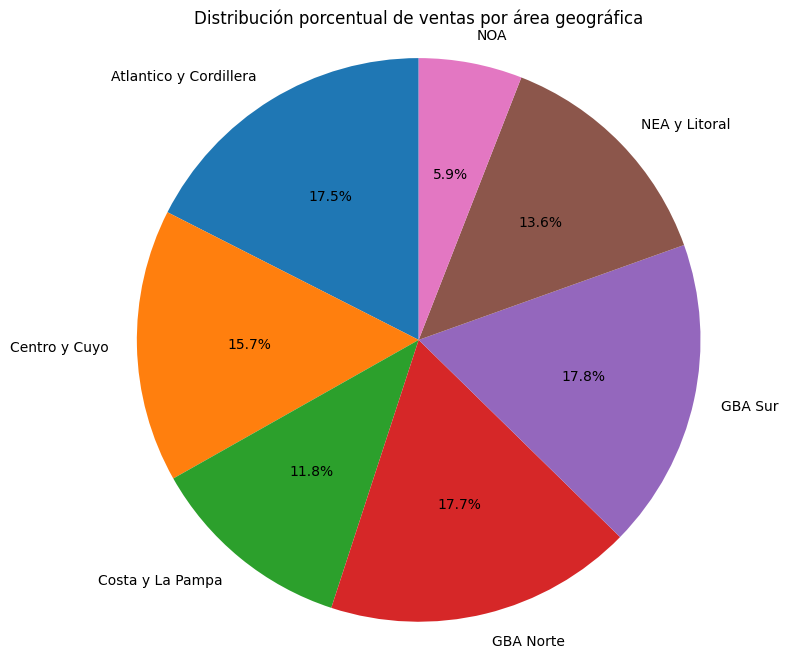

In [100]:

ventas_por_area = df_limpio.groupby('Area')['Cantidad'].sum()
plt.figure(figsize=(8, 8))
plt.pie(ventas_por_area, labels=ventas_por_area.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución porcentual de ventas por área geográfica')
plt.axis('equal')
plt.show()

2. Gráfico de barras – Top 10 productos más vendidos

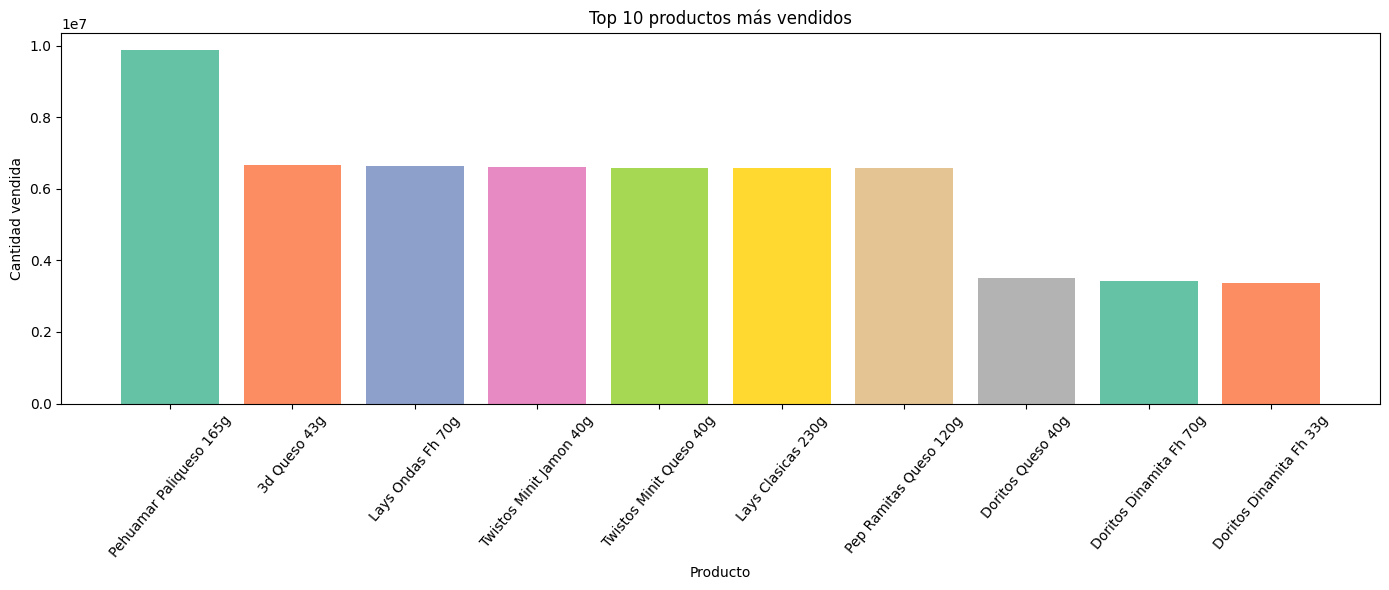

In [99]:
import re

# Agrupar por descripción
productos_top = df_limpio.groupby('Descripcion')['Cantidad'].sum().sort_values(ascending=False).head(10)

# Limpiar etiquetas:
etiquetas_limpias = productos_top.index.to_series().apply(lambda x: re.sub(r'x\d.*', '', x).strip())

# Graficar con descripción y gramos por unidad
plt.figure(figsize=(14, 6))
plt.bar(etiquetas_limpias, productos_top.values, color=plt.cm.Set2.colors)
plt.title('Top 10 productos más vendidos')
plt.xlabel('Producto')
plt.ylabel('Cantidad vendida')
plt.xticks(rotation=50, fontsize=10)
plt.tight_layout()
plt.show()

 3. Histograma – Distribución de cantidades vendidas

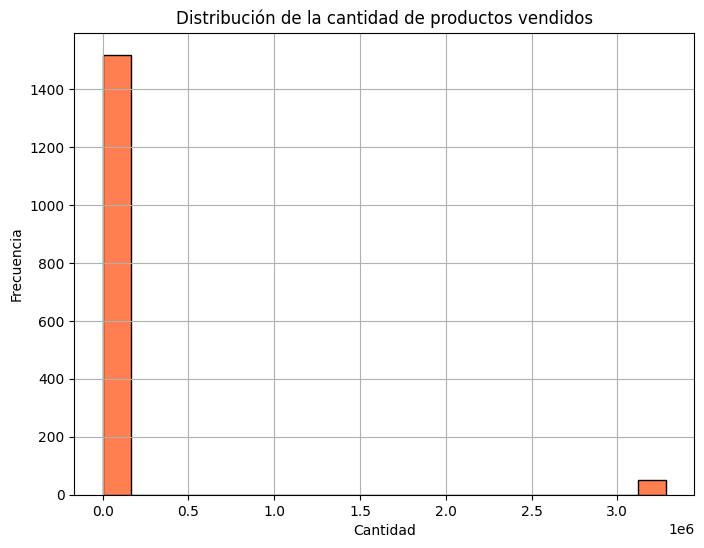

In [91]:
plt.figure(figsize=(8, 6))
plt.hist(df_limpio['Cantidad'], bins=20, color='coral', edgecolor='black')
plt.title('Distribución de la cantidad de productos vendidos')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

4. Boxplot – Variabilidad de ventas por Área

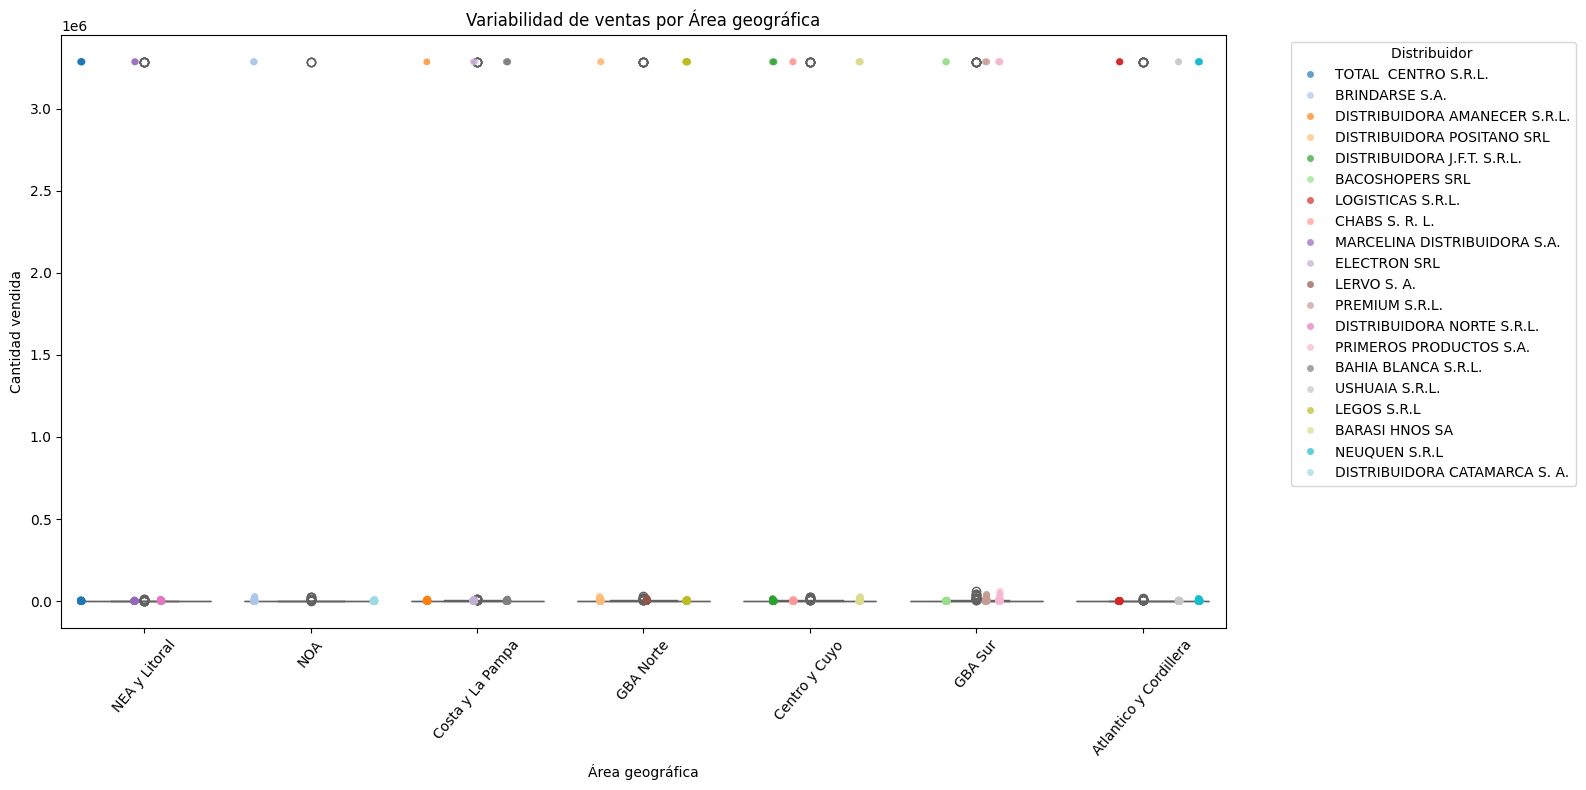

In [106]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_limpio, x='Area', y='Cantidad', palette='Set3', hue='Area', legend=False)
sns.stripplot(data=df_limpio, x='Area', y='Cantidad', hue='Distribuidor ',
              dodge=True, palette='tab20', size=5, alpha=0.7)
plt.title('Variabilidad de ventas por Área geográfica')
plt.xlabel('Área geográfica')
plt.ylabel('Cantidad vendida')
plt.xticks(rotation=50)
plt.legend(title='Distribuidor ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()